# IRIS FLOWER CLASSIFICATION

### Problem Statement:
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. The measurements of the iris flowers according to their species is given, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

### Features:
The four features (attributes) measured for each flower are as follows:
* Sepal Length (in cm): The length of the iris flower's sepal (the outermost whorl of a flower) in centimeters.
* Sepal Width (in cm): The width of the iris flower's sepal in centimeters.
* Petal Length (in cm): The length of the iris flower's petal (the innermost whorl of a flower) in centimeters.
* Petal Width (in cm): The width of the iris flower's petal in centimeters.

### Objectives:
The goal with this dataset is to build a machine learning model that can classify the species of iris flowers based on these four features. It serves as a classic example for practicing classification algorithms. The three species are linearly separable, making it a suitable dataset for demonstrating the capabilities of various machine learning algorithms.


In [1]:
# importing all the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
import copy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# importing os 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iriscsv/Iris.csv


# 1.Loading Dataset

In [3]:
# loading data from the dataset
df= pd.read_csv('/kaggle/input/iriscsv/Iris.csv')


In [4]:
copy_df=copy.deepcopy(df)

# 2.Exploratory Data Analysis

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

There are 150 rows and 6 columns.

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null values in the dataset.

In [11]:
df.duplicated().sum()

0

There is no duplicate entries in the dataset.

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


here the count of the flowers are 150.
the minimum length of the sepal length is 4.3cm speal width is 2cm petal length is 1cm and petal width is 0.1cm
the maximum length of the sepal length is 7.9cm speal width is 6.9cm petal length is cm and petal width is 2.5cm


In [13]:
print('\n Unique values in the SepalLengthCm column is : ' + str(len(df['SepalLengthCm'].unique())))
print('\n Unique values in the SepalWidthCm column is : ' + str(len(df['SepalWidthCm'].unique())))
print('\n Unique values in the PetalLengthCm column is : ' + str(len(df['PetalLengthCm'].unique())))
print('\n Unique values in the PetalWidthCm column is : ' + str(len(df['PetalWidthCm'].unique())))


 Unique values in the SepalLengthCm column is : 35

 Unique values in the SepalWidthCm column is : 23

 Unique values in the PetalLengthCm column is : 43

 Unique values in the PetalWidthCm column is : 22


In [14]:
print('\nThe data distribution for Iris-setosa is given by :\n')
Iris_setosa = df[df['Species']=='Iris-setosa']
print(Iris_setosa.describe())

print('\nThe data distribution for Iris-versicolor is given by :\n')
Iris_versicolor= df[df['Species'] == 'Iris-versicolor']
print(Iris_versicolor.describe())

print('\nThe data distribution for Iris-virginica is given by :\n')
Iris_virginica= df[df['Species'] == 'Iris-virginica']
print(Iris_virginica.describe())


The data distribution for Iris-setosa is given by :

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

The data distribution for Iris-versicolor is given by :

              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.3260

# 3.Data Visualization

## Univariate Analysis

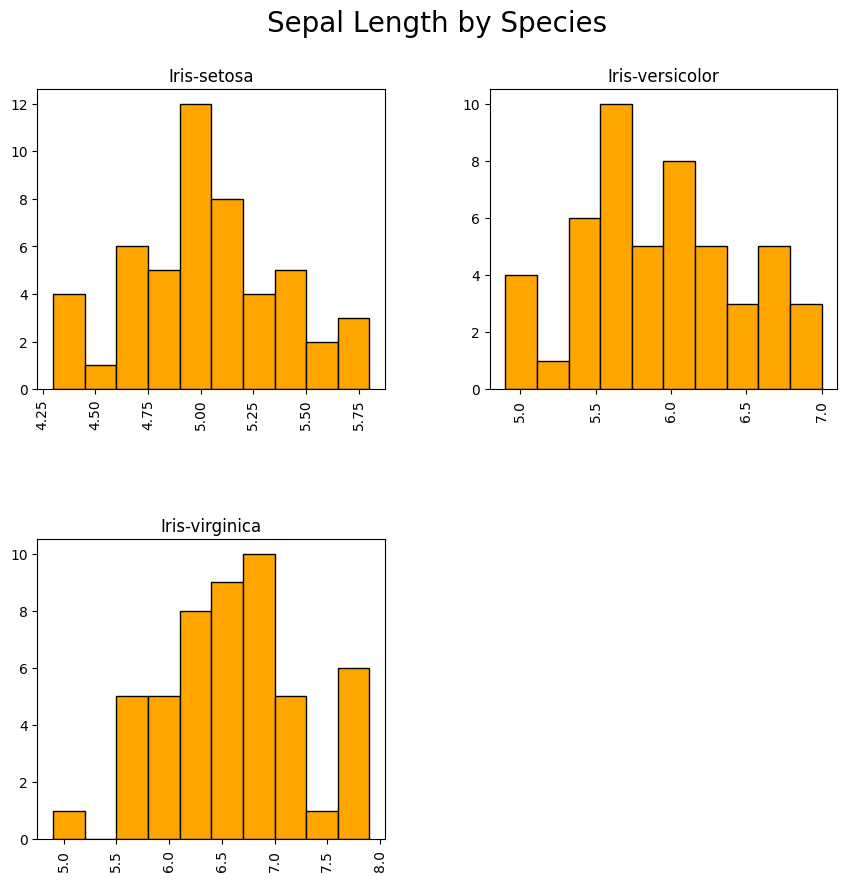

In [15]:
#How does the sepal length vary among the different iris species?

df.hist(column='SepalLengthCm', by='Species', figsize=(10, 10), color='orange', edgecolor='black')
#add titles and labels
plt.suptitle('Sepal Length by Species', fontsize=20)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
#add the labels in x and y

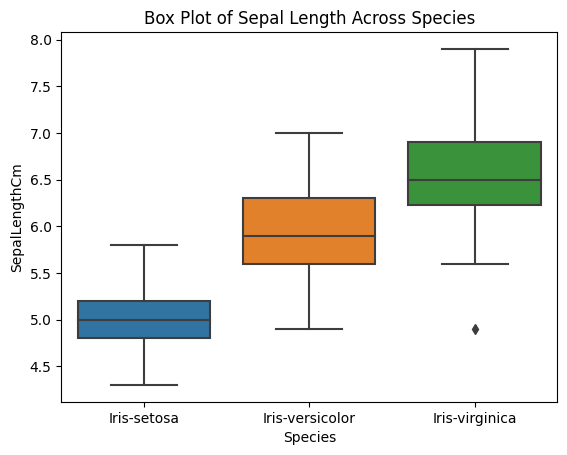

In [16]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Box Plot of Sepal Length Across Species')
plt.show()

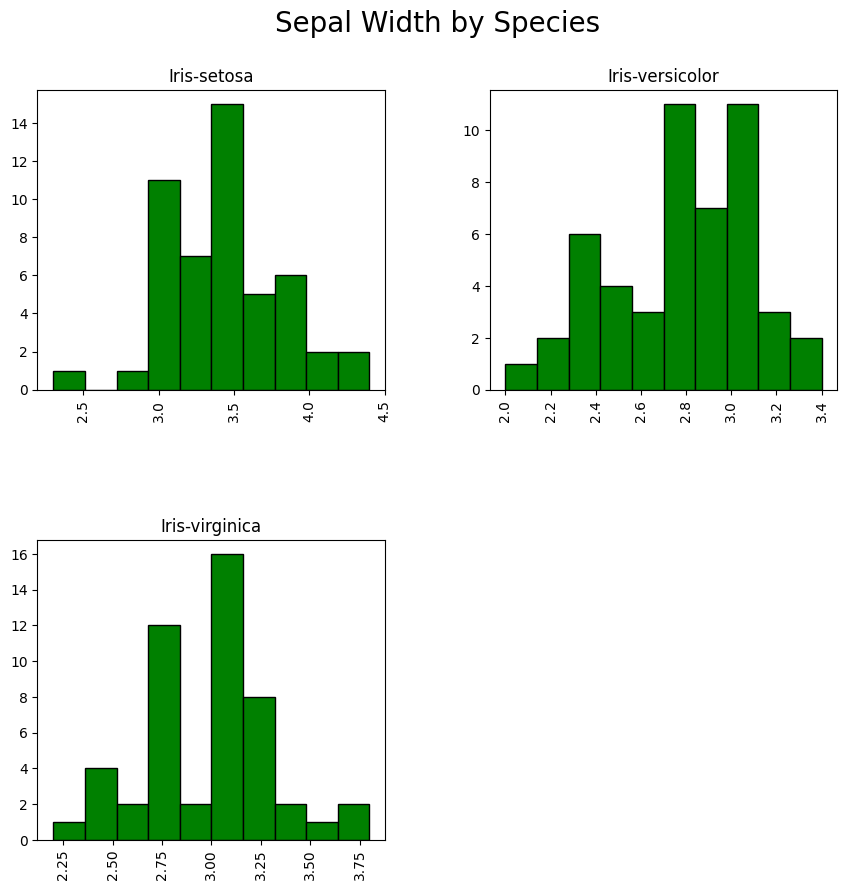

In [17]:
# How does the sepal width vary among the different iris species?
df.hist(column='SepalWidthCm', by='Species', figsize=(10, 10), color='green', edgecolor='black')
#add titles and labels
plt.suptitle('Sepal Width by Species', fontsize=20)
plt.xlabel('Width', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
#add the labels in x and y


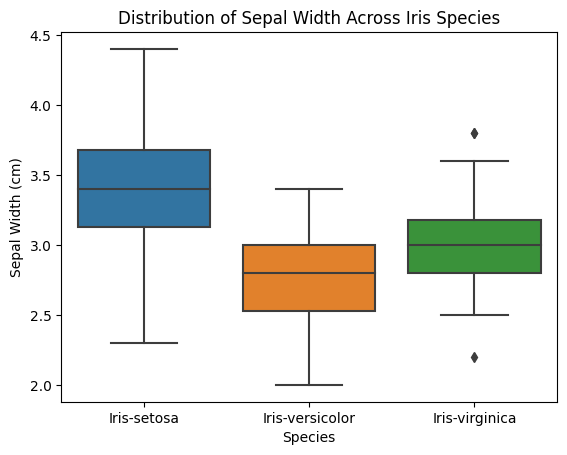

In [18]:
# Is there a noticeable difference in sepal width between the species?
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Distribution of Sepal Width Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

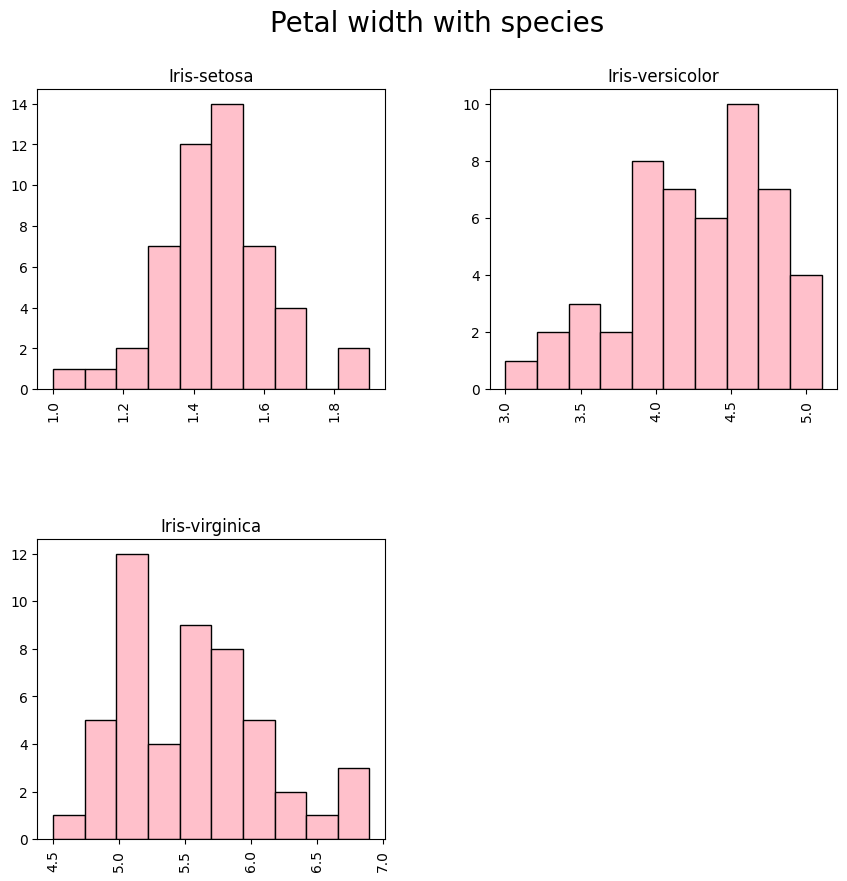

In [19]:
#What is the range of petal lengths for each species?
df.hist(column='PetalLengthCm', by='Species', figsize=(10,10), color='pink',edgecolor='black')
plt.suptitle('Petal width with species', fontsize=20)
plt.xlabel('Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

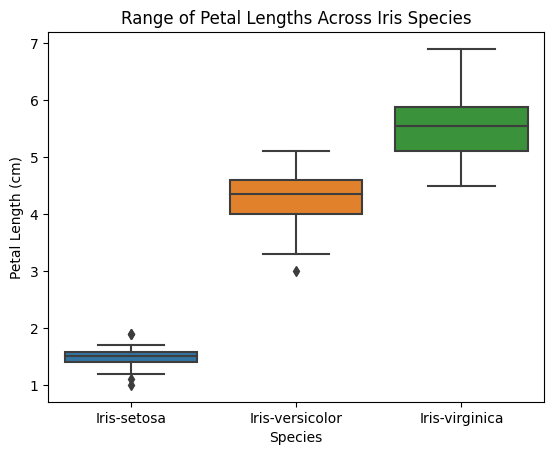

In [20]:
#What is the range of petal lengths for each species?
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Range of Petal Lengths Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

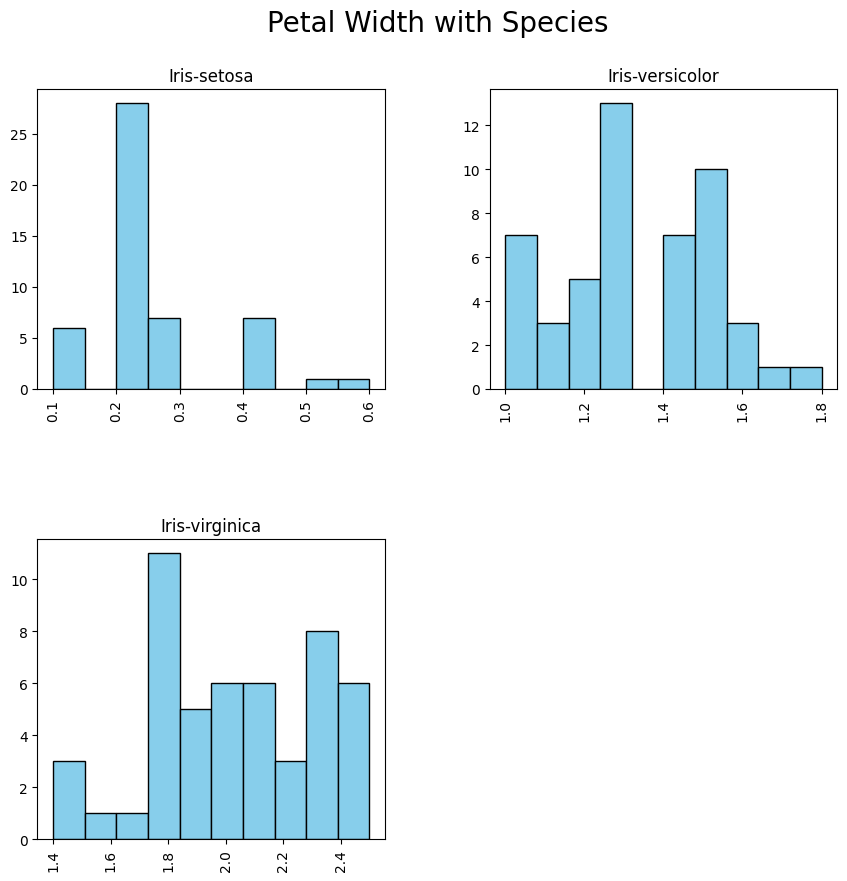

In [21]:
#How is petal width distributed for each iris species?
df.hist(column='PetalWidthCm',by='Species',figsize=(10,10),color='skyblue', edgecolor='black')
plt.suptitle("Petal Width with Species",fontsize=20)
plt.xlabel('Width',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

<Axes: xlabel='Species', ylabel='count'>

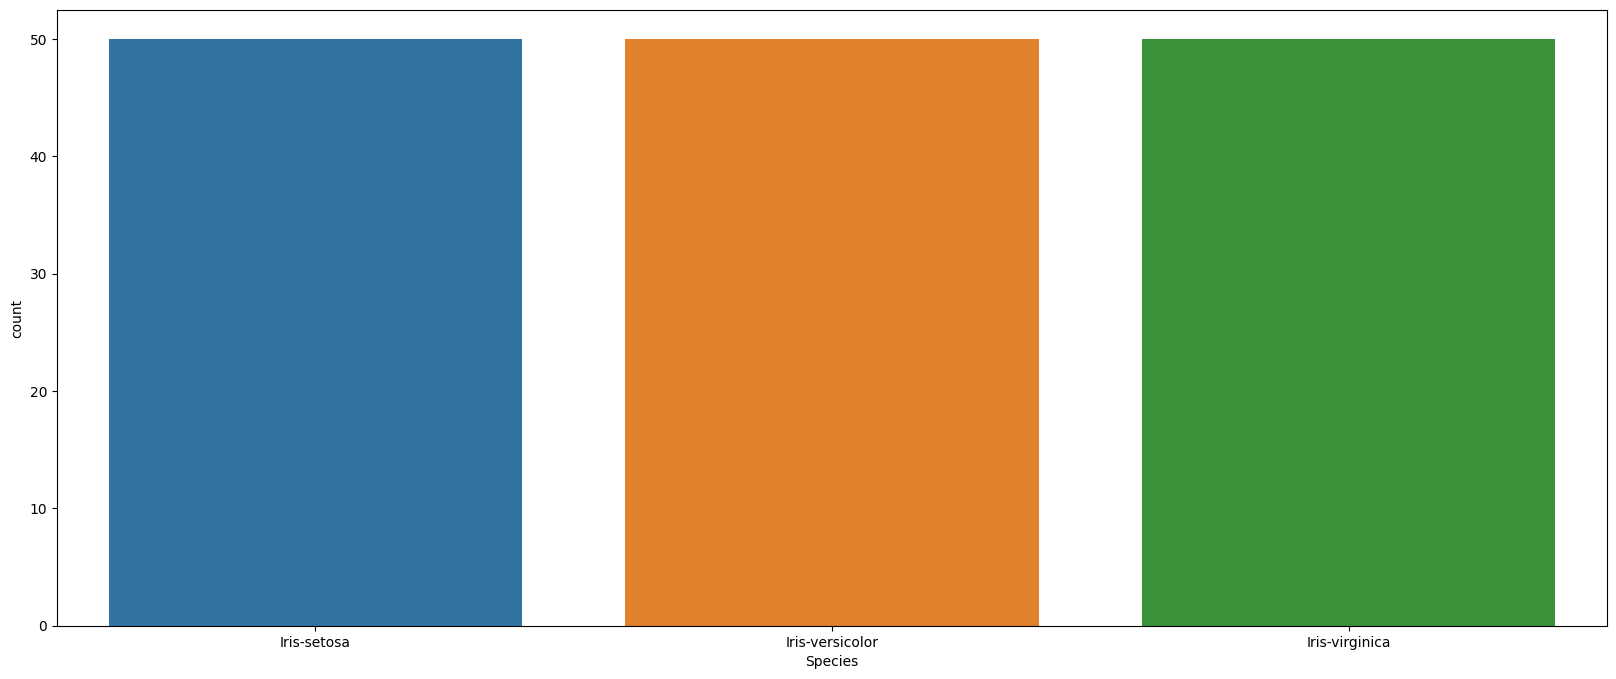

In [22]:
#Number of flowers in each species?
plt.figure(figsize=(20,8))
sns.countplot(df, x="Species")

# Bivariate analysis

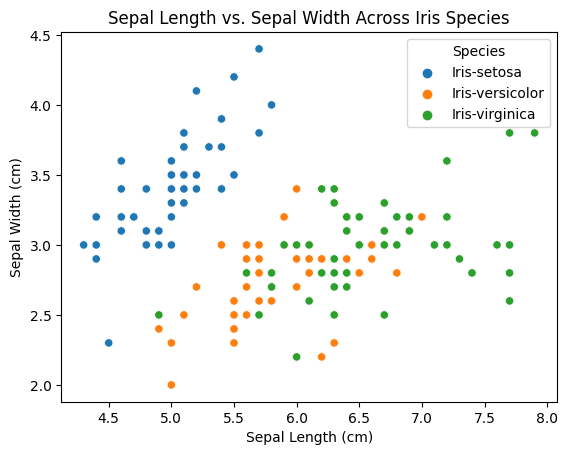

In [23]:
#  Is there a correlation between sepal length and sepal width?
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs. Sepal Width Across Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

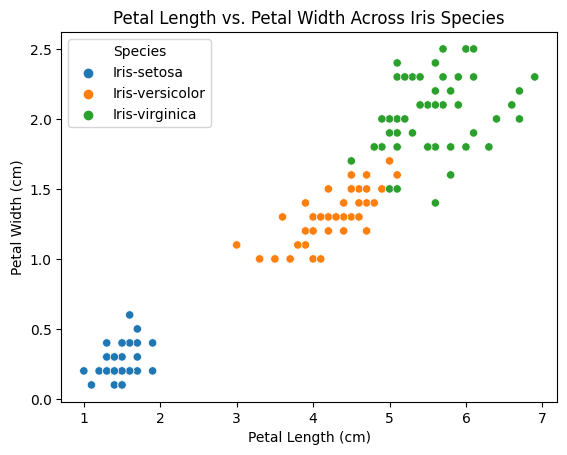

In [24]:
#*   Explore the relationship between petal length and petal width of various species.
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Petal Length vs. Petal Width Across Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

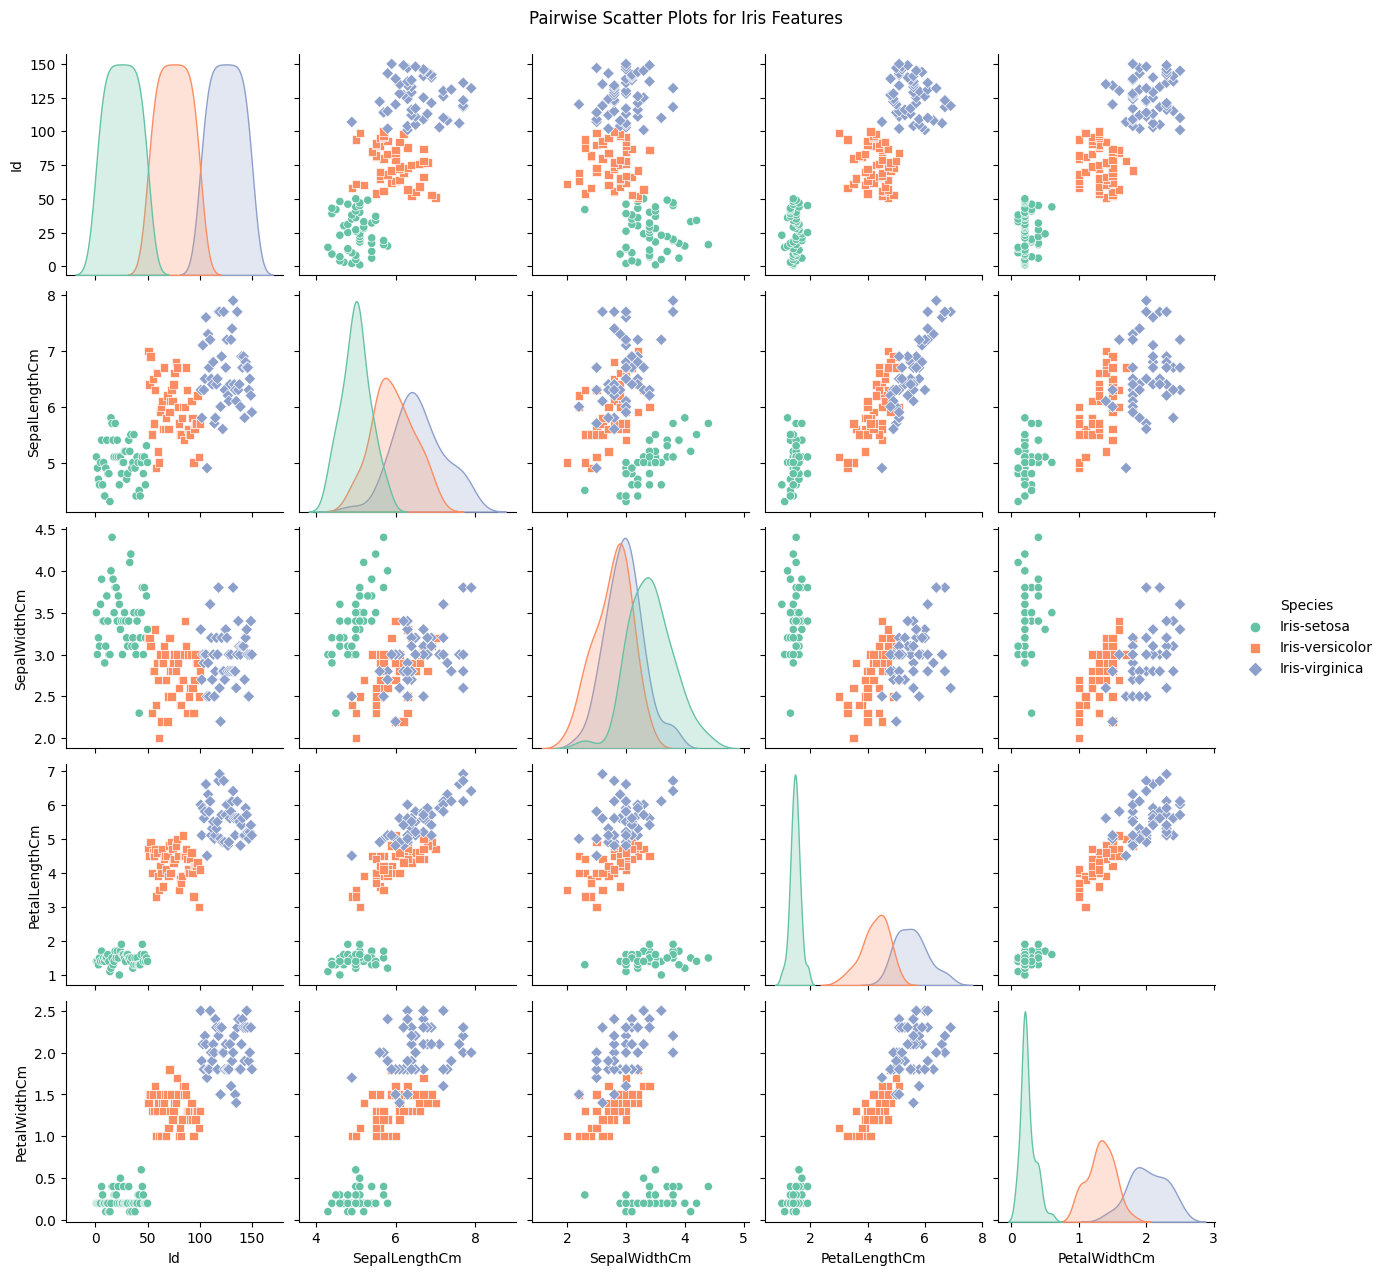

In [25]:
# Create scatter plots for each pair of features, color-coding points by species.
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette='Set2')
plt.suptitle('Pairwise Scatter Plots for Iris Features', y=1.02)
plt.show()

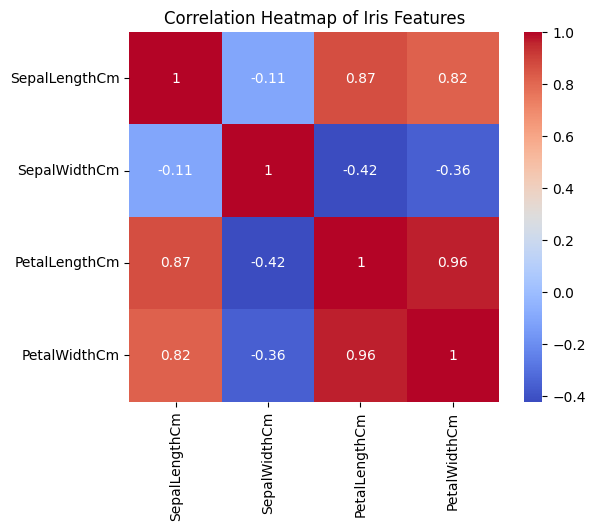

In [26]:
numeric_df = df.drop(['Id', 'Species'], axis=1)
correlation_matrix =numeric_df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

# 4. Data preprocessing

In [27]:
# Extract target variable
y = df['Species']  # Target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Species' column
y_label_encoded = label_encoder.fit_transform(y)

# Display the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Replace the original 'Species' column with the encoded labels
df['Species'] = y_label_encoded

# Display the first few rows of the DataFrame with label-encoded 'Species'
print(df.head())


Label Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [28]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [29]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [30]:
# Splitting the data into features and target variable
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_columns]
y = df['Species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shape of the training and testing sets
print('Training set:', X_train_scaled.shape, y_train.shape)
print('Testing set:', X_test_scaled.shape, y_test.shape)




Training set: (120, 4) (120,)
Testing set: (30, 4) (30,)


# 5. Machine Learning Models

### 1) Logistic Regression

In [31]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred1 = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy*100)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:\
', conf_matrix)


Accuracy: 100.0
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 2) K-Nearest Neighbour

In [32]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy*100}")

# Display classification report
print(classification_report(y_test, y_pred2))


Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 3) Gaussian Naive Bayes

In [33]:
# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred3 = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

# Display the results
print("Accuracy:", accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 100.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 4) RandomForest

In [34]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred4 = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)
class_report = classification_report(y_test, y_pred4)

# Display the results
print("Accuracy:", accuracy*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 100.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 5) Descision Tree

In [35]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred5 = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)
class_report = classification_report(y_test, y_pred5)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### DataFrame

In [36]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Create an empty list to store results
results_list = []

# Loop through models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display the results DataFrame
results_df


,Model,Accuracy,Confusion Matrix,Classification Report
0,Logistic Regression,1.0,"[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
1,Random Forest,1.0,"[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
2,Gaussian Naive Bayes,1.0,"[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
3,K-Nearest Neighbors,1.0,"[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
4,Decision Tree,1.0,"[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."


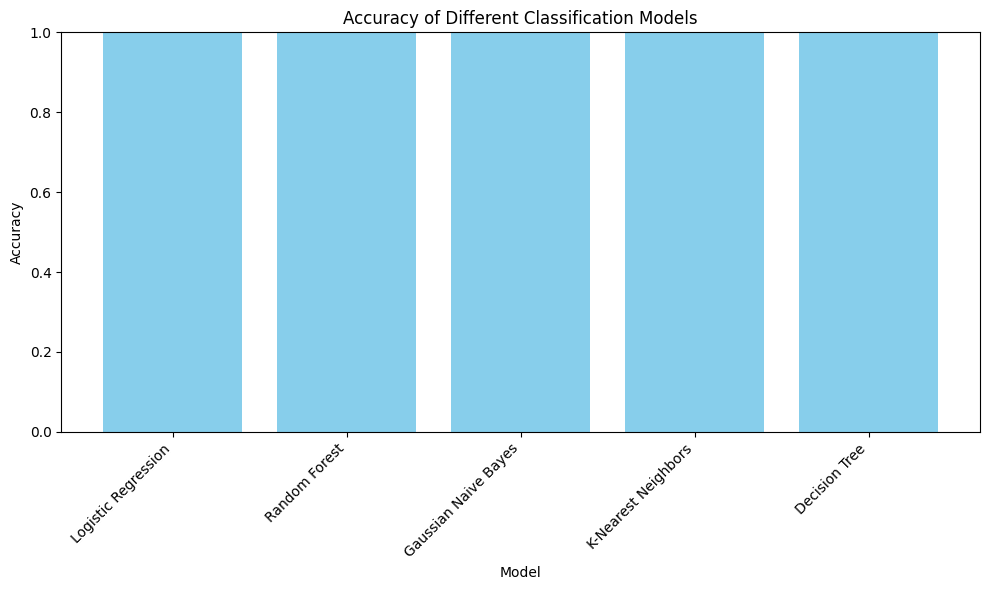

In [37]:
# Plotting a histogram of accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy values are properly displayed
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()
